In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Installed fbprophet
from prophet import Prophet
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
##import the dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Dataset
fd=pd.read_excel('gdrive/My Drive/Exchange Rate Euro-INR_New.xlsx')
fd.head()
fd.shape

,Date,Price
0,2021-10-01,85.9750
1,2021-10-02,85.9750
2,2021-10-03,85.9750
3,2021-10-04,86.4025
4,2021-10-05,86.4880


(140, 2)

In [ ]:
#Summary statistics
fd.describe()

,Price
count,140.000000
mean,85.329354
std,1.104526
min,83.365500
25%,84.419000
50%,85.274000
75%,86.064000
max,87.500000


In [ ]:
## Checking for missing values
fd.isnull().sum()
fd.columns
fd.dtypes

Date     0
Price    0
dtype: int64

Index(['Date', 'Price'], dtype='object')

Date     datetime64[ns]
Price           float64
dtype: object

In [ ]:
#Renaming the columns
fd = fd.rename(columns={'Price':'y','Date':'ds'})
fd = fd.sort_index(axis=1)
fd.head()

,ds,y
0,2021-10-01,85.9750
1,2021-10-02,85.9750
2,2021-10-03,85.9750
3,2021-10-04,86.4025
4,2021-10-05,86.4880


In [ ]:
#Test & train split
train,test = fd[:110],fd[110:]
train.shape
test.shape

(110, 2)

(30, 2)

In [ ]:
train.tail(10)
test.head(12)

,ds,y
100,2022-01-09,83.9780
101,2022-01-10,83.8000
102,2022-01-11,83.7481
103,2022-01-12,84.0285
104,2022-01-13,84.7170
105,2022-01-14,84.9445
106,2022-01-15,84.9445
107,2022-01-16,84.9445
108,2022-01-17,84.7295
109,2022-01-18,84.8130


,ds,y
110,2022-01-19,84.4135
111,2022-01-20,84.3620
112,2022-01-21,84.4190
113,2022-01-22,84.4190
114,2022-01-23,84.4190
115,2022-01-24,84.3495
116,2022-01-25,84.2770
117,2022-01-26,84.4288
118,2022-01-27,83.7893
119,2022-01-28,83.6015


In [ ]:
#Timeseries Model
my_forecast = Prophet(interval_width=0.95) 

In [ ]:
my_forecast.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptvtl3od/rd5pgwoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpptvtl3od/4nkd0mx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35922', 'data', 'file=/tmp/tmpptvtl3od/rd5pgwoa.json', 'init=/tmp/tmpptvtl3od/4nkd0mx1.json', 'output', 'file=/tmp/tmpy62paos0/prophet_model-20220818111300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Predition 30 days future price
forecast_periods = my_forecast.make_future_dataframe(periods=30, include_history=True,freq='D')
forecast_periods

,ds
0,2021-10-01
1,2021-10-02
2,2021-10-03
3,2021-10-04
4,2021-10-05
...,...
135,2022-02-13
136,2022-02-14
137,2022-02-15
138,2022-02-16


In [ ]:
## predicted seasonality and trend
forecast = my_forecast.predict(forecast_periods)
forecast.head(10)
forecast.to_csv('forecast.csv')
forecast1 = forecast.loc[:,['ds','yhat']]  
forecast1.head(10)
forecast3 = forecast.loc[:,['ds','yhat','yhat_lower','yhat_upper']]
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-01,85.975750,85.359396,86.490071,85.975750,85.975750,-0.051316,-0.051316,-0.051316,-0.051316,-0.051316,-0.051316,0.0,0.0,0.0,85.924434
1,2021-10-02,86.078956,85.510404,86.543871,86.078956,86.078956,-0.030590,-0.030590,-0.030590,-0.030590,-0.030590,-0.030590,0.0,0.0,0.0,86.048366
2,2021-10-03,86.182162,85.641309,86.646930,86.182162,86.182162,-0.009865,-0.009865,-0.009865,-0.009865,-0.009865,-0.009865,0.0,0.0,0.0,86.172297
3,2021-10-04,86.285368,85.841703,86.874817,86.285368,86.285368,0.083990,0.083990,0.083990,0.083990,0.083990,0.083990,0.0,0.0,0.0,86.369357
4,2021-10-05,86.388573,85.926947,87.017716,86.388573,86.388573,0.069260,0.069260,0.069260,0.069260,0.069260,0.069260,0.0,0.0,0.0,86.457834
5,2021-10-06,86.491779,85.924128,87.008215,86.491779,86.491779,-0.063238,-0.063238,-0.063238,-0.063238,-0.063238,-0.063238,0.0,0.0,0.0,86.428541
6,2021-10-07,86.594985,86.056574,87.106909,86.594985,86.594985,0.001759,0.001759,0.001759,0.001759,0.001759,0.001759,0.0,0.0,0.0,86.596744
7,2021-10-08,86.698191,86.148070,87.171405,86.698191,86.698191,-0.051316,-0.051316,-0.051316,-0.051316,-0.051316,-0.051316,0.0,0.0,0.0,86.646875
8,2021-10-09,86.801396,86.269139,87.305036,86.801396,86.801396,-0.030590,-0.030590,-0.030590,-0.030590,-0.030590,-0.030590,0.0,0.0,0.0,86.770806
9,2021-10-10,86.904602,86.362346,87.396960,86.904602,86.904602,-0.009865,-0.009865,-0.009865,-0.009865,-0.009865,-0.009865,0.0,0.0,0.0,86.894737


,ds,yhat
0,2021-10-01,85.924434
1,2021-10-02,86.048366
2,2021-10-03,86.172297
3,2021-10-04,86.369357
4,2021-10-05,86.457834
5,2021-10-06,86.428541
6,2021-10-07,86.596744
7,2021-10-08,86.646875
8,2021-10-09,86.770806
9,2021-10-10,86.894737


,ds,yhat,yhat_lower,yhat_upper
0,2021-10-01,85.924434,85.359396,86.490071
1,2021-10-02,86.048366,85.510404,86.543871
2,2021-10-03,86.172297,85.641309,86.646930
3,2021-10-04,86.369357,85.841703,86.874817
4,2021-10-05,86.457834,85.926947,87.017716


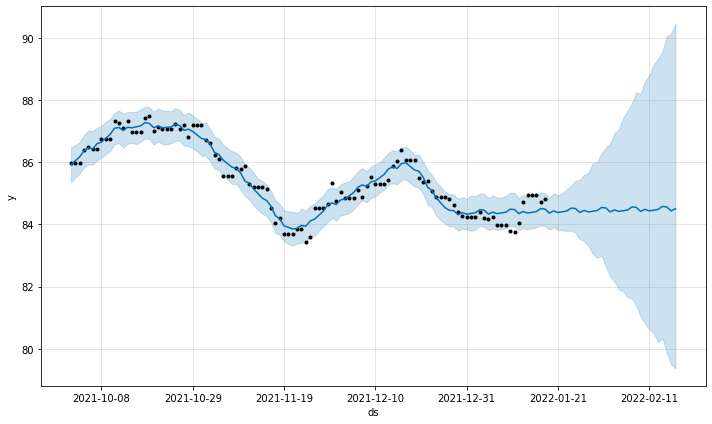

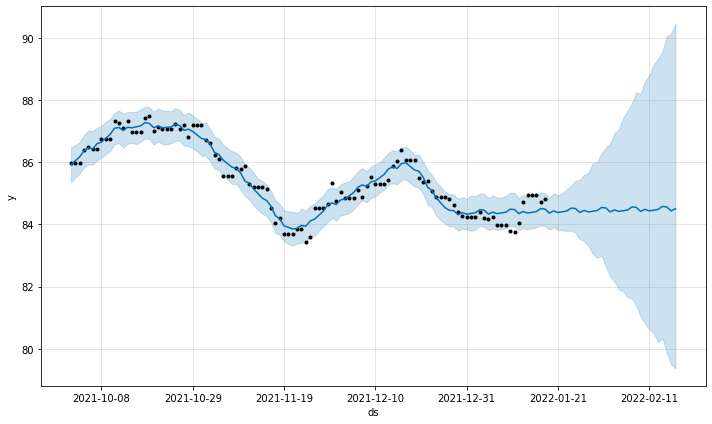

In [ ]:
#Ploting the forecasting values in a line graph
my_forecast.plot(forecast,uncertainty=True)

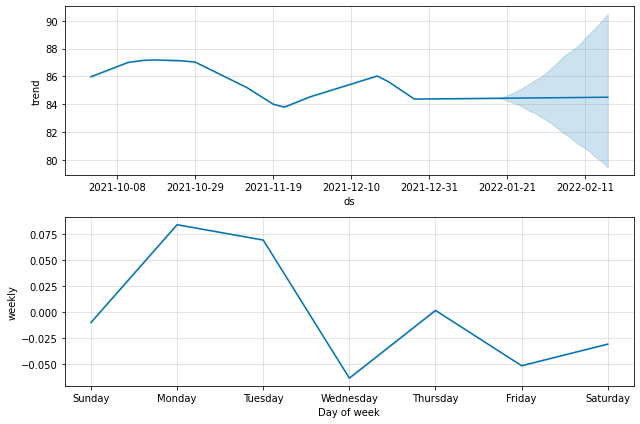

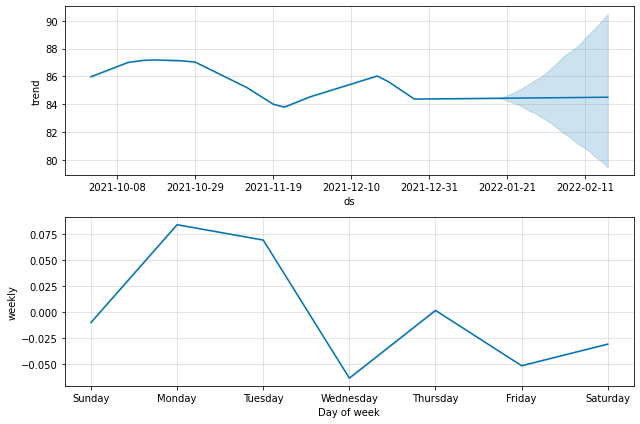

In [ ]:
my_forecast.plot_components(forecast,uncertainty=True)

In [ ]:
## We merge our predicted values with test data

final_df = pd.merge(forecast1, test, on='ds', how='inner')
final_df.head()
final_df.tail()

,ds,yhat,y
0,2022-01-19,84.363628,84.4135
1,2022-01-20,84.431139,84.3620
2,2022-01-21,84.380578,84.4190
3,2022-01-22,84.403818,84.4190
4,2022-01-23,84.427058,84.4190


,ds,yhat,y
25,2022-02-13,84.479853,85.8535
26,2022-02-14,84.576221,85.4715
27,2022-02-15,84.564006,85.4430
28,2022-02-16,84.434021,85.3885
29,2022-02-17,84.501533,85.2935


In [ ]:
#Renamed to original column names
final_df = final_df.rename(columns = {'yhat':'Prophet_Prediction','y':'actual'})

In [ ]:
final_df

,ds,Prophet_Prediction,actual
0,2022-01-19,84.363628,84.4135
1,2022-01-20,84.431139,84.3620
2,2022-01-21,84.380578,84.4190
3,2022-01-22,84.403818,84.4190
4,2022-01-23,84.427058,84.4190
5,2022-01-24,84.523426,84.3495
6,2022-01-25,84.511211,84.2770
7,2022-01-26,84.381226,84.4288
8,2022-01-27,84.448738,83.7893
9,2022-01-28,84.398176,83.6015


In [ ]:
final_df.set_index('ds',inplace=True)
final_df

,Prophet_Prediction,actual
ds,,
2022-01-19,84.363628,84.4135
2022-01-20,84.431139,84.3620
2022-01-21,84.380578,84.4190
2022-01-22,84.403818,84.4190
2022-01-23,84.427058,84.4190
2022-01-24,84.523426,84.3495
2022-01-25,84.511211,84.2770
2022-01-26,84.381226,84.4288
2022-01-27,84.448738,83.7893


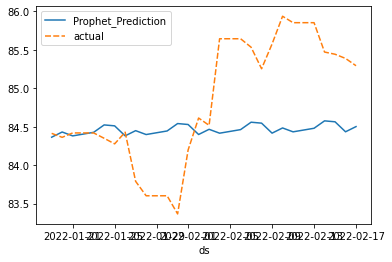

In [ ]:
#SNS plot showing the actual vs prophet predicted
sns.lineplot(data = final_df)

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
#Mean absolute error
np.round(metrics.mean_absolute_error(final_df.Prophet_Prediction, final_df.actual),2)

0.71

In [ ]:
#Mean absolute percentage error
print('Prophet MAPE')
np.mean(np.abs((final_df.actual - final_df.Prophet_Prediction)/final_df.actual))*100

Prophet MAPE


0.8282275871456418

In [ ]:
#Splitting data into train and test for Arima model
train = train.iloc[::-1]
test = test[::-1]

In [ ]:
train.head()
test.head()
train.set_index('ds',inplace=True)
test.set_index('ds',inplace=True)

,ds,y
109,2022-01-18,84.8130
108,2022-01-17,84.7295
107,2022-01-16,84.9445
106,2022-01-15,84.9445
105,2022-01-14,84.9445


,ds,y
139,2022-02-17,85.2935
138,2022-02-16,85.3885
137,2022-02-15,85.4430
136,2022-02-14,85.4715
135,2022-02-13,85.8535


In [ ]:
train.head()

,y
ds,
2022-01-18,84.8130
2022-01-17,84.7295
2022-01-16,84.9445
2022-01-15,84.9445
2022-01-14,84.9445


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.3 MB/s 
     |████████████████████████████████| 9.8 MB 44.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# fitting a stepwise model:
from pmdarima import auto_arima
Arima_model = auto_arima(train, start_p=0, start_q=0, d=1, max_p=8, max_q=8,max_d =2,start_P=0, start_Q=0, max_P=8, max_Q=8,m=30,
                          seasonal=True,trace=True, error_action='warn',suppress_warnings= True, 
                          stepwise=True, random_state= 20, n_fits= 30)

Arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=29.156, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=32.487, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=32.311, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=27.324, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[30] intercept   : AIC=30.487, Time=0.31 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=30.314, Time=0.23 sec
 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=31.145, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=31.146, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=32.727, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[30]          
Total fit time: 3.556 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -12.662
Date:                Thu, 18 Aug 2022   AIC                             27.324
Time:                        11:13:17   BIC                             30.015
Sample:                             0   HQIC                            28.415
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0739      0.008      9.210      0.000       0.058       0.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.72
Prob(Q):                              0.91   Prob(JB):                         0.02
Heteroskedasticity (H):               1.24   Skew:                            -0.30
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Arima model prediction for 30 future days
prediction = pd.DataFrame(Arima_model.predict(n_periods=30), index = test.index)
prediction.columns = ['Arima_Prediction']
prediction

,Arima_Prediction
ds,
2022-02-17,85.975
2022-02-16,85.975
2022-02-15,85.975
2022-02-14,85.975
2022-02-13,85.975
2022-02-12,85.975
2022-02-11,85.975
2022-02-10,85.975
2022-02-09,85.975


In [ ]:
#Merging the values of the predicted arima model with actual
final_df = pd.merge(final_df, prediction, how = 'inner', on = 'ds')

In [ ]:
# Predicted values of Prophet vs Arima vs Actual
final_df

,Prophet_Prediction,actual,Arima_Prediction
ds,,,
2022-01-19,84.363628,84.4135,85.975
2022-01-20,84.431139,84.3620,85.975
2022-01-21,84.380578,84.4190,85.975
2022-01-22,84.403818,84.4190,85.975
2022-01-23,84.427058,84.4190,85.975
2022-01-24,84.523426,84.3495,85.975
2022-01-25,84.511211,84.2770,85.975
2022-01-26,84.381226,84.4288,85.975
2022-01-27,84.448738,83.7893,85.975


In [ ]:
#Mean absolute error
metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction)

1.1493866666666634

In [ ]:
#Mean absolute percentage error
print('Prophet MAPE')
np.mean(np.abs((final_df.actual - final_df.Arima_Prediction)/final_df.actual))*100

Prophet MAPE


1.363845409644573

In [ ]:
#Means absolute error of prophet and arima
print('Prophet MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Prophet_Prediction),2)
print()
print('ARIMA MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction),2)
print()

Prophet MAE


0.71


ARIMA MAE


1.15

In [ ]:
# Holt-Winter model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

In [ ]:
# 30 days future prediction
model = HW(train.y, seasonal_periods=30, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#create a forcast for the next 30 steps beyond the final data point in the training data set
Prediction = fitted.forecast(steps=30)
HW_Prediction=pd.DataFrame(Prediction)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
HW_Prediction

,0
110,85.796818
111,85.837243
112,85.766563
113,85.927084
114,85.578486
115,85.569417
116,85.716636
117,85.831109
118,85.764318
119,85.834920


In [ ]:
#print out the training summary
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  110
Model:             ExponentialSmoothing   SSE                              5.990
Optimized:                         True   AIC                           -252.137
Trend:                         Additive   BIC                           -160.320
Seasonal:                Multiplicative   AICC                          -215.643
Seasonal Periods:                    30   Date:                 Thu, 18 Aug 2022
Box-Cox:                          False   Time:                         11:13:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [ ]:
HW_Prediction.columns = ['HW_Prediction']

In [ ]:
#predicted values
HW_Prediction

,HW_Prediction
110,85.796818
111,85.837243
112,85.766563
113,85.927084
114,85.578486
115,85.569417
116,85.716636
117,85.831109
118,85.764318
119,85.834920


In [ ]:
HW_Prediction.set_index(test.index,inplace=True)

In [ ]:
HW_Prediction
test

,HW_Prediction
ds,
2022-02-17,85.796818
2022-02-16,85.837243
2022-02-15,85.766563
2022-02-14,85.927084
2022-02-13,85.578486
2022-02-12,85.569417
2022-02-11,85.716636
2022-02-10,85.831109
2022-02-09,85.764318


,y
ds,
2022-02-17,85.2935
2022-02-16,85.3885
2022-02-15,85.4430
2022-02-14,85.4715
2022-02-13,85.8535
2022-02-12,85.8535
2022-02-11,85.8535
2022-02-10,85.9373
2022-02-09,85.5765


In [ ]:
# merging the columns with previous results
final_df = pd.merge(final_df, HW_Prediction, how = 'inner', on ='ds')

In [ ]:
# renaming the column
final_df = final_df.rename(columns = {'y':'actual'})

In [ ]:
# Predicted values of Prophet vs Ariam vs Holt-winter vs Actual
final_df

,Prophet_Prediction,actual,Arima_Prediction,HW_Prediction
ds,,,,
2022-01-19,84.363628,84.4135,85.975,86.266597
2022-01-20,84.431139,84.3620,85.975,85.998399
2022-01-21,84.380578,84.4190,85.975,86.042637
2022-01-22,84.403818,84.4190,85.975,86.006002
2022-01-23,84.427058,84.4190,85.975,86.033185
2022-01-24,84.523426,84.3495,85.975,85.833220
2022-01-25,84.511211,84.2770,85.975,85.882942
2022-01-26,84.381226,84.4288,85.975,85.931254
2022-01-27,84.448738,83.7893,85.975,86.022544


In [ ]:
#mean absolute error
print('Holt Winters MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.HW_Prediction),2)

Holt Winters MAE


1.2

In [ ]:
#mean absolute percentage error
print('Holt Winters MAPE')
np.mean(np.abs((final_df.actual - final_df.HW_Prediction)/final_df.actual))*100

Holt Winters MAPE


1.4263555198159785

In [ ]:
#Mean absolute error values of 3 models
print('Prophet MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Prophet_Prediction),2)
print()
print('ARIMA MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction),2)
print()
print('Holt Winters MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.HW_Prediction),2)

Prophet MAE


0.71


ARIMA MAE


1.15


Holt Winters MAE


1.2